Importing necessary packages!

In [19]:
import spacy
import json
import random

A function for loading the data from JSON files!

In [20]:
def load_data(file):
    with open(file, "r", encoding="utf-8") as f:
        data = json.load(f)
    return (data)

A function for exporting to a JSON file!

In [21]:
def save_data(file, data):
    with open (file, "w", encoding="utf-8") as f:
        json.dump(data, f, indent=4)

A function for **training** our custom NER NLP model!


In [23]:
from spacy.training.example import Example
def train_ner_nlp_model(data, iterations):
    TRAIN_DATA = data
    nlp = spacy.blank("en") #A new blank ENGLISH NLP object.
    #Checking if a NER component already exists in the pipeline.
    if("ner" not in nlp.pipe_names): 
        #Add new NER pipe or else get the existing ner pipe.
        ner = nlp.add_pipe("ner")
    else:
        ner = nlp.get_pipe("ner")
    
    for _, annotations in TRAIN_DATA:
        for ent in annotations.get("entities"):
            ner.add_label(ent[2])

    #Creating a list of other pipes, except the NER pipe.
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != "ner"]
    #For training our specific pipe, we need to disable other pipes.
    with nlp.select_pipes(disable=other_pipes):
        optimizer = nlp.initialize()
        for itn in range(iterations):
            print("Starting iteration " + str(itn))
            random.shuffle(TRAIN_DATA)
            losses = {}
            for text, annotations in TRAIN_DATA:
                example = Example.from_dict(nlp.make_doc(text), annotations)
                nlp.update(
                    [example],
                    sgd=optimizer,
                    losses=losses
                )
            print (losses)
        return (nlp)

Loading up our **training_data** to TRAIN_DATA variable!  
Starting then **training** our custom NER NLP model with our training_data!  
**Exporting** our trained model!

In [26]:
TRAIN_DATA = load_data("../CustomNER_NLP_Model/data/voicecommander_training_data.json")
nlp = train_ner_nlp_model(TRAIN_DATA, 30) #30 iterations for training.

Starting iteration 0
{'ner': 1215.7533855080924}
Starting iteration 1
{'ner': 276.29608007022057}
Starting iteration 2
{'ner': 118.88118444559254}
Starting iteration 3
{'ner': 60.66880052279526}
Starting iteration 4
{'ner': 42.097868391824356}
Starting iteration 5
{'ner': 21.706837480532275}
Starting iteration 6
{'ner': 16.53282063488413}
Starting iteration 7
{'ner': 12.133412200681326}
Starting iteration 8
{'ner': 5.591667551615153}
Starting iteration 9
{'ner': 5.506782916645082}
Starting iteration 10
{'ner': 1.497115773098788}
Starting iteration 11
{'ner': 0.21620299463258208}
Starting iteration 12
{'ner': 0.3398483090306731}
Starting iteration 13
{'ner': 0.00018144224139068847}
Starting iteration 14
{'ner': 3.315621176195974e-07}
Starting iteration 15
{'ner': 1.8358057238752712e-07}
Starting iteration 16
{'ner': 2.257231133676981e-05}
Starting iteration 17
{'ner': 1.5611147595848527e-05}
Starting iteration 18
{'ner': 4.751662259699018e-06}
Starting iteration 19
{'ner': 2.43587961950

**Exporting** our custom NER NLP model!

In [27]:
nlp.to_disk("voicecommander_custom_ner_nlp_model")

It’s time to test our custom NER NLP model to see how well it recognizes  
our desired entities in **unseen data** (i.e., how well it generalizes).

In [28]:
unseen_data_text = """
In the heart of the bustling campus, the library, often referred to as the intellectual hub, stood proudly. 
As the sun began to set, the duty of illuminating the vast expanse fell upon the lone lamp perched on 
the librarian's desk. The computer, a source of infinite knowledge, hummed quietly in the corner, 
waiting to be awakened. Students would often gather in the aula to turn on the projector and the light for presentations, 
with the remote always seeming to be missing just when it was needed most. In the adjacent gymnasium, 
the coach would routinely turn off the loudspeaker once the game had ended. Meanwhile, the science lab 
was a domain of exploration, where students would put on their goggles and gloves, ready to dive into 
the world of experiments. 
"""

Giving our custom NER NLP model the unseen_data_text!

In [29]:
doc = nlp(unseen_data_text)

Showing the result of our model that has recieved an unseen data!

In [32]:
from spacy import displacy
colors = {"PLACE": "radial-gradient(#ccffcc, #008000)", 
          "DEVICE": "linear-gradient(45deg, #ffcc99, #ff6600)", 
          "VERB": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
options = {"ents": ["PLACE", "DEVICE", "VERB"], "colors": colors}
displacy.render(doc, style="ent", jupyter=True, options=options)

A screenshot that shows different colors for different entities and their labels!  
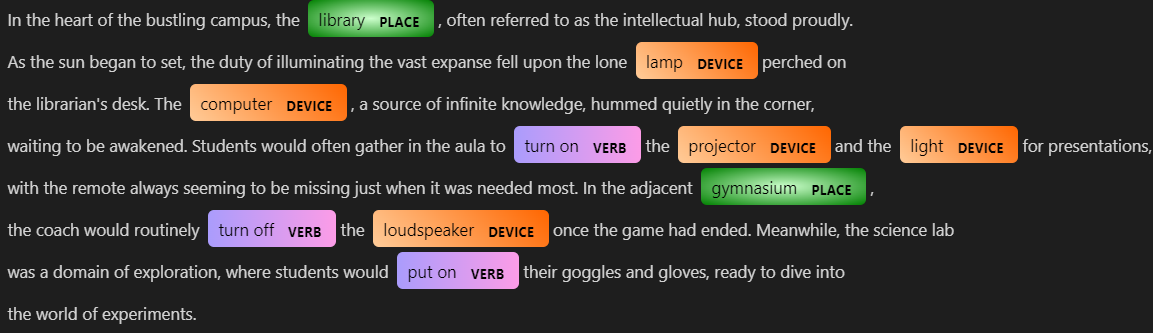